In [35]:
import pandas as pd, random
#suponer estos datos

random.seed(412)  # Para fijar la aleatoridad

datos = {
    'ID de transacción': list(range(1, 101)),
    'Monto ($)': [random.uniform(500, 100000) for _ in range(100)],
    'Tipo de transacción': random.choices(['Compra', 'Retiro'], k=100),
    'Ubicación': random.choices(['México', 'Estados Unidos', 'Canadá', "Colombia", "Perú"], k=100),
    'Etiqueta de fraude': random.choices(['No', 'Sí'], k=100)
}

df = pd.DataFrame(datos)

print(df)

    ID de transacción     Monto ($) Tipo de transacción       Ubicación  \
0                   1  29104.826689              Compra        Colombia   
1                   2  71192.177609              Compra          Canadá   
2                   3   6274.317377              Retiro          México   
3                   4  99479.491876              Compra          México   
4                   5  11875.620351              Retiro          México   
..                ...           ...                 ...             ...   
95                 96  44333.802161              Compra            Perú   
96                 97   2685.853927              Retiro        Colombia   
97                 98  78321.469349              Retiro            Perú   
98                 99  90762.067223              Retiro        Colombia   
99                100  60826.371693              Retiro  Estados Unidos   

   Etiqueta de fraude  
0                  Sí  
1                  No  
2                  No  
3  

### Análisis exploratorio

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID de transacción    100 non-null    int64  
 1   Monto ($)            100 non-null    float64
 2   Tipo de transacción  100 non-null    object 
 3   Ubicación            100 non-null    object 
 4   Etiqueta de fraude   100 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ KB
None


In [19]:
print(df.describe())

       ID de transacción     Monto ($)
count         100.000000    100.000000
mean           50.500000  46866.094726
std            29.011492  27005.410110
min             1.000000   1957.457081
25%            25.750000  23023.380912
50%            50.500000  48400.823696
75%            75.250000  67118.542571
max           100.000000  99479.491876


In [21]:
df.describe()

,ID de transacción,Monto ($)
count,100.000000,100.000000
mean,50.500000,46866.094726
std,29.011492,27005.410110
min,1.000000,1957.457081
25%,25.750000,23023.380912
50%,50.500000,48400.823696
75%,75.250000,67118.542571
max,100.000000,99479.491876


In [22]:
print("Frecuencia de valores en 'Tipo de transacción':")
print(df['Tipo de transacción'].value_counts())  # Cuenta la frecuencia de cada valor en la columna 'Tipo de transacción'
print()

Frecuencia de valores en 'Tipo de transacción':
Compra    51
Retiro    49
Name: Tipo de transacción, dtype: int64



Text(0.5, 1.0, 'Distribución de montos de transacción')

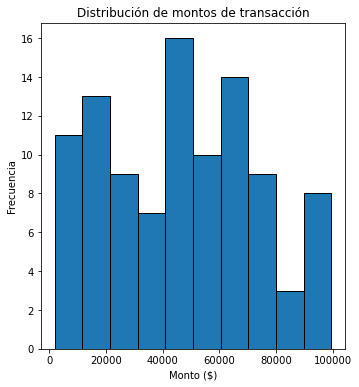

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Histograma de los montos de transacción
plt.subplot(1, 2, 1)
plt.hist(df['Monto ($)'], bins=10, edgecolor='black')
plt.xlabel('Monto ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de montos de transacción')

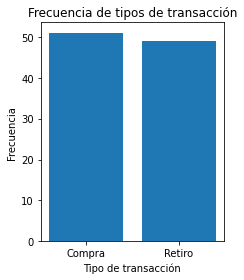

In [31]:
plt.subplot(1, 2, 2)
transaction_counts = df['Tipo de transacción'].value_counts()
plt.bar(transaction_counts.index, transaction_counts.values)
plt.xlabel('Tipo de transacción')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de tipos de transacción')

plt.tight_layout()
plt.show()

### Exploración de datos visuales 


In [36]:
import seaborn as sns


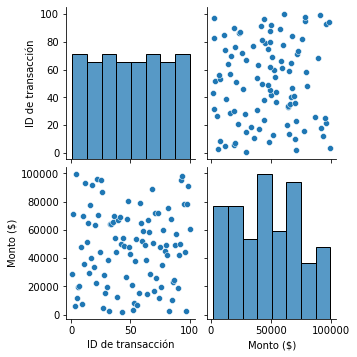

In [39]:
sns.pairplot(df)


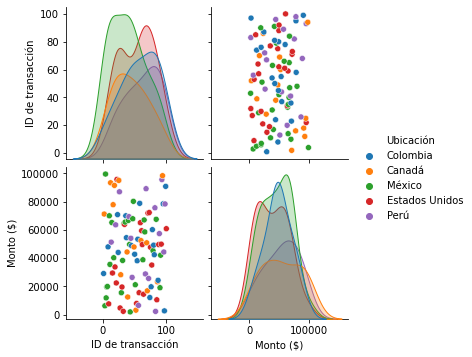

In [50]:
sns.pairplot(df,hue="Ubicación")#estos datos son ficticios porque incluso son aleatorios


### Regresión logística

Es un modelo de clasificación que se utiliza para calcular la probabilidad de que ocurra un evento. Es útil para clasificar transacciones como fraudulentas o no fraudulentas.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [53]:
X = df[['Monto ($)']] # Características utilizadas para la predicción (en este caso, solo el monto)
y = df['Etiqueta de fraude']  # Variable objetivo (etiqueta de fraude)



In [64]:
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Creación y entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression()

In [66]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [67]:
print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))
print("Matriz de confusión:")
print(confusion)

Exactitud del modelo: 55.00%
Matriz de confusión:
[[ 0  9]
 [ 0 11]]


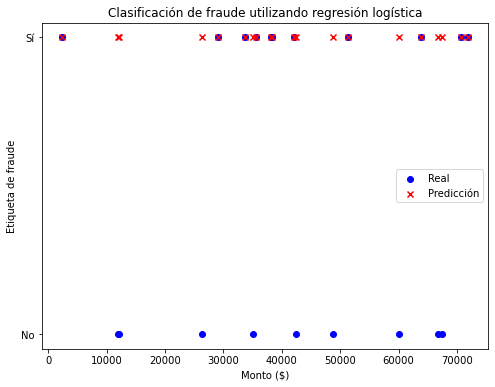

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Real')
plt.scatter(X_test, y_pred, color='red', marker='x', label='Predicción')
plt.xlabel('Monto ($)')
plt.ylabel('Etiqueta de fraude')
plt.title('Clasificación de fraude utilizando regresión logística')
plt.legend()
plt.show()

Como se puede ver en la matriz de confusión el modelo solo predijo correctamente $11$ datos y $9$ predicciones erroneas. Por eso el modelo tiene $55\%$ de precisión.